In [8]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import yfinance as yf
import talib                     
import pynance as py             
import quantstats as qs 
import glob
import os


# Make plots a bit nicer
plt.style.use("seaborn-v0_8")
plt.rcParams["figure.figsize"] = (12, 6)


In [5]:

df = pd.read_csv("../data/AAPL.csv")
df.head()


,Date,Close,High,Low,Open,Volume
0,2009-01-02,2.721686,2.730385,2.554037,2.575630,746015200
1,2009-01-05,2.836553,2.884539,2.780469,2.794266,1181608400
2,2009-01-06,2.789767,2.914229,2.770872,2.877641,1289310400
3,2009-01-07,2.729484,2.774170,2.706990,2.753477,753048800
4,2009-01-08,2.780169,2.793666,2.700393,2.712090,673500800


In [6]:

df_news = pd.read_csv("../data/raw_analyst_ratings.csv")
print(df_news['stock'].unique()[:30])
print("Total unique tickers:", df_news['stock'].nunique())

['A' 'AA' 'AAC' 'AADR' 'AAL' 'AAMC' 'AAME' 'AAN' 'AAOI' 'AAON' 'AAP'
 'AAPL' 'AAU' 'AAV' 'AAVL' 'AAWW' 'AAXJ' 'AB' 'ABAC' 'ABAX' 'ABB' 'ABBV'
 'ABC' 'ABCB' 'ABCD' 'ABCO' 'ABCW' 'ABDC' 'ABEV' 'ABG']
Total unique tickers: 6204


In [9]:
files = glob.glob("../data/*.csv")
price_files = [f for f in files if "raw_analyst_ratings" not in f]
price_files

['../data\\AAPL.csv',
 '../data\\AMZN.csv',
 '../data\\GOOG.csv',
 '../data\\META.csv',
 '../data\\MSFT.csv',
 '../data\\NVDA.csv']

In [10]:
dataframes = []

for file in price_files:
    df = pd.read_csv(file)
    ticker = os.path.basename(file).replace(".csv", "")
    df["Ticker"] = ticker
    dataframes.append(df)


In [11]:
all_prices = pd.concat(dataframes, ignore_index=True)


In [26]:
ratings = pd.read_csv("../data/raw_analyst_ratings.csv")

In [54]:
ratings["date"] = pd.to_datetime(ratings["date"], errors="coerce", utc=True)
ratings["stock"] = ratings["stock"].str.upper()
ratings[ratings["date"].isna()]
ratings['date'].isna().sum()



np.int64(1351341)

In [32]:
ratings["date"].head(20).tolist()


[Timestamp('2020-06-05 14:30:54+0000', tz='UTC'),
 Timestamp('2020-06-03 14:45:20+0000', tz='UTC'),
 Timestamp('2020-05-26 08:30:07+0000', tz='UTC'),
 Timestamp('2020-05-22 16:45:06+0000', tz='UTC'),
 Timestamp('2020-05-22 15:38:59+0000', tz='UTC'),
 Timestamp('2020-05-22 15:23:25+0000', tz='UTC'),
 Timestamp('2020-05-22 13:36:20+0000', tz='UTC'),
 Timestamp('2020-05-22 13:07:04+0000', tz='UTC'),
 Timestamp('2020-05-22 12:37:59+0000', tz='UTC'),
 Timestamp('2020-05-22 12:06:17+0000', tz='UTC'),
 NaT,
 NaT,
 NaT,
 NaT,
 NaT,
 NaT,
 NaT,
 NaT,
 NaT,
 NaT]

In [30]:
ratings["date"].dtype


datetime64[ns, UTC]

In [34]:
ratings_raw = pd.read_csv("../data/raw_analyst_ratings.csv", dtype={"date": "string"})


In [25]:
df_raw = pd.read_csv("../data/raw_analyst_ratings.csv", dtype={"date": "string"})

# Try converting
parsed = pd.to_datetime(df_raw["date"], errors="coerce")

# Get bad rows correctly
bad_raw = df_raw[parsed.isna()]

bad_raw.head()
bad_raw.sample(10)
bad_raw["date"].unique()[:50]


<StringArray>
['2020-05-22 00:00:00', '2020-05-21 00:00:00', '2020-05-18 00:00:00',
 '2020-05-16 00:00:00', '2020-05-15 00:00:00', '2020-05-08 00:00:00',
 '2020-05-05 00:00:00', '2020-05-01 00:00:00', '2020-04-28 00:00:00',
 '2020-04-23 00:00:00', '2020-04-22 00:00:00', '2020-04-14 00:00:00',
 '2020-04-08 00:00:00', '2020-04-06 00:00:00', '2020-04-02 00:00:00',
 '2020-04-01 00:00:00', '2020-03-31 00:00:00', '2020-03-30 00:00:00',
 '2020-03-27 00:00:00', '2020-03-26 00:00:00', '2020-03-20 00:00:00',
 '2020-03-16 00:00:00', '2020-03-13 00:00:00', '2020-03-12 00:00:00',
 '2020-03-11 00:00:00', '2020-03-03 00:00:00', '2020-03-02 00:00:00',
 '2020-02-24 00:00:00', '2020-02-19 00:00:00', '2020-02-18 00:00:00',
 '2020-02-14 00:00:00', '2020-02-06 00:00:00', '2020-02-05 00:00:00',
 '2020-01-30 00:00:00', '2020-01-22 00:00:00', '2020-01-17 00:00:00',
 '2020-01-16 00:00:00', '2020-01-15 00:00:00', '2020-01-10 00:00:00',
 '2020-01-09 00:00:00', '2020-01-08 00:00:00', '2020-01-07 00:00:00',
 '2020

In [33]:
invalid_dates = ratings[ratings["date"].isna()][["date"]]
invalid_dates.head(20)


,date
10,NaT
11,NaT
12,NaT
13,NaT
14,NaT
15,NaT
16,NaT
17,NaT
18,NaT
19,NaT


In [35]:
ratings_raw['date'].head(20).tolist()

['2020-06-05 10:30:54-04:00',
 '2020-06-03 10:45:20-04:00',
 '2020-05-26 04:30:07-04:00',
 '2020-05-22 12:45:06-04:00',
 '2020-05-22 11:38:59-04:00',
 '2020-05-22 11:23:25-04:00',
 '2020-05-22 09:36:20-04:00',
 '2020-05-22 09:07:04-04:00',
 '2020-05-22 08:37:59-04:00',
 '2020-05-22 08:06:17-04:00',
 '2020-05-22 00:00:00',
 '2020-05-22 00:00:00',
 '2020-05-21 00:00:00',
 '2020-05-21 00:00:00',
 '2020-05-21 00:00:00',
 '2020-05-21 00:00:00',
 '2020-05-18 00:00:00',
 '2020-05-16 00:00:00',
 '2020-05-15 00:00:00',
 '2020-05-08 00:00:00']

In [36]:
# Convert with errors='coerce' but keep raw
temp = pd.to_datetime(ratings_raw["date"], errors="coerce", utc=True)

# All rows that failed
invalid = ratings_raw[temp.isna()]["date"]

invalid.head(50).tolist()


['2020-05-22 00:00:00',
 '2020-05-22 00:00:00',
 '2020-05-21 00:00:00',
 '2020-05-21 00:00:00',
 '2020-05-21 00:00:00',
 '2020-05-21 00:00:00',
 '2020-05-18 00:00:00',
 '2020-05-16 00:00:00',
 '2020-05-15 00:00:00',
 '2020-05-08 00:00:00',
 '2020-05-05 00:00:00',
 '2020-05-01 00:00:00',
 '2020-04-28 00:00:00',
 '2020-04-23 00:00:00',
 '2020-04-22 00:00:00',
 '2020-04-14 00:00:00',
 '2020-04-08 00:00:00',
 '2020-04-06 00:00:00',
 '2020-04-02 00:00:00',
 '2020-04-01 00:00:00',
 '2020-03-31 00:00:00',
 '2020-03-30 00:00:00',
 '2020-03-30 00:00:00',
 '2020-03-27 00:00:00',
 '2020-03-26 00:00:00',
 '2020-03-26 00:00:00',
 '2020-03-26 00:00:00',
 '2020-03-20 00:00:00',
 '2020-03-16 00:00:00',
 '2020-03-16 00:00:00',
 '2020-03-13 00:00:00',
 '2020-03-12 00:00:00',
 '2020-03-11 00:00:00',
 '2020-03-03 00:00:00',
 '2020-03-02 00:00:00',
 '2020-02-24 00:00:00',
 '2020-02-24 00:00:00',
 '2020-02-24 00:00:00',
 '2020-02-19 00:00:00',
 '2020-02-18 00:00:00',
 '2020-02-18 00:00:00',
 '2020-02-18 00:

In [37]:
ratings_raw["date"].dtype


string[python]

In [38]:
ratings_raw["date"].isna().sum()


np.int64(0)

In [39]:
# Attempt conversion
temp = pd.to_datetime(ratings_raw["date"], errors="coerce")

# Extract only the raw strings that became NaT
invalid_raw = ratings_raw.loc[temp.isna(), "date"]

invalid_raw.value_counts().head(50)


date
2020-03-12 00:00:00    1766
2020-02-27 00:00:00    1292
2020-02-28 00:00:00    1239
2019-08-01 00:00:00    1228
2020-03-06 00:00:00    1147
2018-08-02 00:00:00    1138
2009-08-10 00:00:00    1130
2018-10-30 00:00:00    1129
2018-07-26 00:00:00    1125
2019-07-31 00:00:00    1116
2019-08-07 00:00:00    1114
2020-03-11 00:00:00    1102
2018-11-01 00:00:00    1101
2018-08-08 00:00:00    1089
2020-04-15 00:00:00    1067
2019-11-07 00:00:00    1065
2018-08-01 00:00:00    1062
2020-03-09 00:00:00    1052
2020-01-22 00:00:00    1048
2020-01-21 00:00:00    1046
2019-07-30 00:00:00    1045
2018-10-29 00:00:00    1041
2019-08-05 00:00:00    1032
2011-07-28 00:00:00    1032
2020-03-16 00:00:00    1023
2018-10-24 00:00:00    1015
2020-03-23 00:00:00    1015
2020-02-20 00:00:00    1009
2017-11-02 00:00:00    1007
2018-08-07 00:00:00    1004
2018-07-25 00:00:00    1002
2020-03-10 00:00:00     983
2020-03-17 00:00:00     975
2019-08-08 00:00:00     973
2018-11-08 00:00:00     966
2018-08-09 00:0

In [40]:
ratings_raw["date"].apply(type).value_counts()


date
<class 'str'>    1407328
Name: count, dtype: int64

In [43]:
ratings_raw["date"].str.contains(r"[^\x00-\x7F]", regex=True).sum()


np.int64(0)

In [42]:
ratings_raw.loc[temp.isna(), "date"].head(20).apply(repr).tolist()


["'2020-05-22 00:00:00'",
 "'2020-05-22 00:00:00'",
 "'2020-05-21 00:00:00'",
 "'2020-05-21 00:00:00'",
 "'2020-05-21 00:00:00'",
 "'2020-05-21 00:00:00'",
 "'2020-05-18 00:00:00'",
 "'2020-05-16 00:00:00'",
 "'2020-05-15 00:00:00'",
 "'2020-05-08 00:00:00'",
 "'2020-05-05 00:00:00'",
 "'2020-05-01 00:00:00'",
 "'2020-04-28 00:00:00'",
 "'2020-04-23 00:00:00'",
 "'2020-04-22 00:00:00'",
 "'2020-04-14 00:00:00'",
 "'2020-04-08 00:00:00'",
 "'2020-04-06 00:00:00'",
 "'2020-04-02 00:00:00'",
 "'2020-04-01 00:00:00'"]

In [44]:
ratings_raw["date_clean"] = ratings_raw["date"].str.strip("'\"")


In [45]:
ratings_raw["date_parsed"] = pd.to_datetime(ratings_raw["date_clean"], errors="coerce", utc=True)
ratings_raw["date_parsed"].isna().sum()


np.int64(1351341)

In [46]:
ratings_raw.head()

,Unnamed: 0,headline,url,publisher,date,stock,date_clean,date_parsed
0,0,Stocks That Hit 52-Week Highs On Friday,https://www.benzinga.com/news/20/06/16190091/s...,Benzinga Insights,2020-06-05 10:30:54-04:00,A,2020-06-05 10:30:54-04:00,2020-06-05 14:30:54+00:00
1,1,Stocks That Hit 52-Week Highs On Wednesday,https://www.benzinga.com/news/20/06/16170189/s...,Benzinga Insights,2020-06-03 10:45:20-04:00,A,2020-06-03 10:45:20-04:00,2020-06-03 14:45:20+00:00
2,2,71 Biggest Movers From Friday,https://www.benzinga.com/news/20/05/16103463/7...,Lisa Levin,2020-05-26 04:30:07-04:00,A,2020-05-26 04:30:07-04:00,2020-05-26 08:30:07+00:00
3,3,46 Stocks Moving In Friday's Mid-Day Session,https://www.benzinga.com/news/20/05/16095921/4...,Lisa Levin,2020-05-22 12:45:06-04:00,A,2020-05-22 12:45:06-04:00,2020-05-22 16:45:06+00:00
4,4,B of A Securities Maintains Neutral on Agilent...,https://www.benzinga.com/news/20/05/16095304/b...,Vick Meyer,2020-05-22 11:38:59-04:00,A,2020-05-22 11:38:59-04:00,2020-05-22 15:38:59+00:00


In [47]:
ratings_raw["date_parsed"].isna().mean()  # fraction of missing dates
ratings_raw["date_parsed"].notna().sum()  # count of valid dates
ratings_raw["date_parsed"].isna().sum()   # count of invalid/missing dates


np.int64(1351341)

In [48]:
ratings_raw.loc[ratings_raw["date_parsed"].isna(), "date"].value_counts().head(20)


date
2020-03-12 00:00:00    1766
2020-02-27 00:00:00    1292
2020-02-28 00:00:00    1239
2019-08-01 00:00:00    1228
2020-03-06 00:00:00    1147
2018-08-02 00:00:00    1138
2009-08-10 00:00:00    1130
2018-10-30 00:00:00    1129
2018-07-26 00:00:00    1125
2019-07-31 00:00:00    1116
2019-08-07 00:00:00    1114
2020-03-11 00:00:00    1102
2018-11-01 00:00:00    1101
2018-08-08 00:00:00    1089
2020-04-15 00:00:00    1067
2019-11-07 00:00:00    1065
2018-08-01 00:00:00    1062
2020-03-09 00:00:00    1052
2020-01-22 00:00:00    1048
2020-01-21 00:00:00    1046
Name: count, dtype: Int64

In [49]:
ratings_raw["date_parsed"] = pd.to_datetime(
    ratings_raw["date"].str.strip().str.strip("'\""),
    errors="coerce",
    utc=True
)


In [50]:
ratings_raw["date_parsed"].isna().sum()   # should drop drastically
ratings_raw["date_parsed"].head()


0   2020-06-05 14:30:54+00:00
1   2020-06-03 14:45:20+00:00
2   2020-05-26 08:30:07+00:00
3   2020-05-22 16:45:06+00:00
4   2020-05-22 15:38:59+00:00
Name: date_parsed, dtype: datetime64[ns, UTC]

In [51]:
recent_news = ratings_raw[ratings_raw["date_parsed"] >= "2020-01-01"]


In [52]:
ratings_raw["year"] = ratings_raw["date_parsed"].dt.year
ratings_raw["month"] = ratings_raw["date_parsed"].dt.month
ratings_raw["day"] = ratings_raw["date_parsed"].dt.day


In [53]:
ratings_raw.dropna(subset=["date_parsed"], inplace=True)


In [55]:
# Ensure the 'Date' column is datetime
all_prices["Date"] = pd.to_datetime(all_prices["Date"])

# Sort by ticker and date
all_prices = all_prices.sort_values(["Ticker", "Date"]).reset_index(drop=True)

# Optional: preview
all_prices.head()


,Date,Close,High,Low,Open,Volume,Ticker
0,2009-01-02,2.721686,2.730385,2.554037,2.575630,746015200,AAPL
1,2009-01-05,2.836553,2.884539,2.780469,2.794266,1181608400,AAPL
2,2009-01-06,2.789767,2.914229,2.770872,2.877641,1289310400,AAPL
3,2009-01-07,2.729484,2.774170,2.706990,2.753477,753048800,AAPL
4,2009-01-08,2.780169,2.793666,2.700393,2.712090,673500800,AAPL


In [56]:
# Uppercase the stock column
ratings["stock"] = ratings["stock"].str.upper()

# Drop rows with missing dates
ratings = ratings.dropna(subset=["date"]).reset_index(drop=True)

# Optional preview
ratings.head()


,Unnamed: 0,headline,url,publisher,date,stock
0,0,Stocks That Hit 52-Week Highs On Friday,https://www.benzinga.com/news/20/06/16190091/s...,Benzinga Insights,2020-06-05 14:30:54+00:00,A
1,1,Stocks That Hit 52-Week Highs On Wednesday,https://www.benzinga.com/news/20/06/16170189/s...,Benzinga Insights,2020-06-03 14:45:20+00:00,A
2,2,71 Biggest Movers From Friday,https://www.benzinga.com/news/20/05/16103463/7...,Lisa Levin,2020-05-26 08:30:07+00:00,A
3,3,46 Stocks Moving In Friday's Mid-Day Session,https://www.benzinga.com/news/20/05/16095921/4...,Lisa Levin,2020-05-22 16:45:06+00:00,A
4,4,B of A Securities Maintains Neutral on Agilent...,https://www.benzinga.com/news/20/05/16095304/b...,Vick Meyer,2020-05-22 15:38:59+00:00,A


In [57]:
ratings["news_date"] = ratings["date"].dt.date
all_prices["price_date"] = all_prices["Date"].dt.date


In [58]:
merged = pd.merge(
    ratings,
    all_prices,
    left_on=["stock", "news_date"],
    right_on=["Ticker", "price_date"],
    how="left"
)

# Optional preview
merged.head()


,Unnamed: 0,headline,url,publisher,date,stock,news_date,Date,Close,High,Low,Open,Volume,Ticker,price_date
0,0,Stocks That Hit 52-Week Highs On Friday,https://www.benzinga.com/news/20/06/16190091/s...,Benzinga Insights,2020-06-05 14:30:54+00:00,A,2020-06-05,NaT,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1,1,Stocks That Hit 52-Week Highs On Wednesday,https://www.benzinga.com/news/20/06/16170189/s...,Benzinga Insights,2020-06-03 14:45:20+00:00,A,2020-06-03,NaT,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2,2,71 Biggest Movers From Friday,https://www.benzinga.com/news/20/05/16103463/7...,Lisa Levin,2020-05-26 08:30:07+00:00,A,2020-05-26,NaT,NaN,NaN,NaN,NaN,NaN,NaN,NaN
3,3,46 Stocks Moving In Friday's Mid-Day Session,https://www.benzinga.com/news/20/05/16095921/4...,Lisa Levin,2020-05-22 16:45:06+00:00,A,2020-05-22,NaT,NaN,NaN,NaN,NaN,NaN,NaN,NaN
4,4,B of A Securities Maintains Neutral on Agilent...,https://www.benzinga.com/news/20/05/16095304/b...,Vick Meyer,2020-05-22 15:38:59+00:00,A,2020-05-22,NaT,NaN,NaN,NaN,NaN,NaN,NaN,NaN


In [59]:
# Sort by ticker and date first
all_prices = all_prices.sort_values(["Ticker", "Date"])

# Compute daily returns
all_prices["daily_return"] = all_prices.groupby("Ticker")["Close"].pct_change()


In [60]:
merged.head()


,Unnamed: 0,headline,url,publisher,date,stock,news_date,Date,Close,High,Low,Open,Volume,Ticker,price_date
0,0,Stocks That Hit 52-Week Highs On Friday,https://www.benzinga.com/news/20/06/16190091/s...,Benzinga Insights,2020-06-05 14:30:54+00:00,A,2020-06-05,NaT,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1,1,Stocks That Hit 52-Week Highs On Wednesday,https://www.benzinga.com/news/20/06/16170189/s...,Benzinga Insights,2020-06-03 14:45:20+00:00,A,2020-06-03,NaT,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2,2,71 Biggest Movers From Friday,https://www.benzinga.com/news/20/05/16103463/7...,Lisa Levin,2020-05-26 08:30:07+00:00,A,2020-05-26,NaT,NaN,NaN,NaN,NaN,NaN,NaN,NaN
3,3,46 Stocks Moving In Friday's Mid-Day Session,https://www.benzinga.com/news/20/05/16095921/4...,Lisa Levin,2020-05-22 16:45:06+00:00,A,2020-05-22,NaT,NaN,NaN,NaN,NaN,NaN,NaN,NaN
4,4,B of A Securities Maintains Neutral on Agilent...,https://www.benzinga.com/news/20/05/16095304/b...,Vick Meyer,2020-05-22 15:38:59+00:00,A,2020-05-22,NaT,NaN,NaN,NaN,NaN,NaN,NaN,NaN


In [61]:
from textblob import TextBlob
# Create a new column 'sentiment'
merged["sentiment"] = merged["headline"].apply(lambda x: TextBlob(str(x)).sentiment.polarity)


In [62]:
daily_sentiment = merged.groupby(["stock", "news_date"])["sentiment"].mean().reset_index()
daily_sentiment.rename(columns={"sentiment": "avg_sentiment"}, inplace=True)
daily_sentiment.head()


,stock,news_date,avg_sentiment
0,A,2020-05-22,0.035714
1,A,2020-05-26,0.000000
2,A,2020-06-03,0.000000
3,A,2020-06-05,0.000000
4,AA,2020-05-18,0.062500


In [63]:
# Merge sentiment with price returns
sentiment_returns = pd.merge(
    daily_sentiment,
    all_prices[["Ticker", "price_date", "daily_return"]],
    left_on=["stock", "news_date"],
    right_on=["Ticker", "price_date"],
    how="inner"
)

sentiment_returns.head()


,stock,news_date,avg_sentiment,Ticker,price_date,daily_return
0,AAPL,2020-06-09,0.088333,AAPL,2020-06-09,0.031578
1,AAPL,2020-06-10,0.166919,AAPL,2020-06-10,0.025728
2,AMZN,2020-06-09,-0.020833,AMZN,2020-06-09,0.030427
3,AMZN,2020-06-10,0.204798,AMZN,2020-06-10,0.017913
4,GOOG,2020-06-04,0.000000,GOOG,2020-06-04,-0.016848


In [64]:
# Pearson correlation
correlation = sentiment_returns["avg_sentiment"].corr(sentiment_returns["daily_return"])
print("Correlation between news sentiment and stock returns:", correlation)


Correlation between news sentiment and stock returns: 0.160659898718745


In [65]:
stock_corr = sentiment_returns.groupby("stock").apply(
    lambda x: x["avg_sentiment"].corr(x["daily_return"])
).reset_index(name="correlation")

stock_corr.head(10)


C:\Users\hp\AppData\Local\Temp\ipykernel_14268\3042195463.py:1: FutureWarning: DataFrameGroupBy.apply operated on the grouping columns. This behavior is deprecated, and in a future version of pandas the grouping columns will be excluded from the operation. Either pass `include_groups=False` to exclude the groupings or explicitly select the grouping columns after groupby to silence this warning.
  stock_corr = sentiment_returns.groupby("stock").apply(


,stock,correlation
0,AAPL,-1.000000
1,AMZN,-1.000000
2,GOOG,-0.089444
3,NVDA,0.175699


In [66]:

import seaborn as sns

# Optional: nicer default style
sns.set_theme(style="whitegrid")


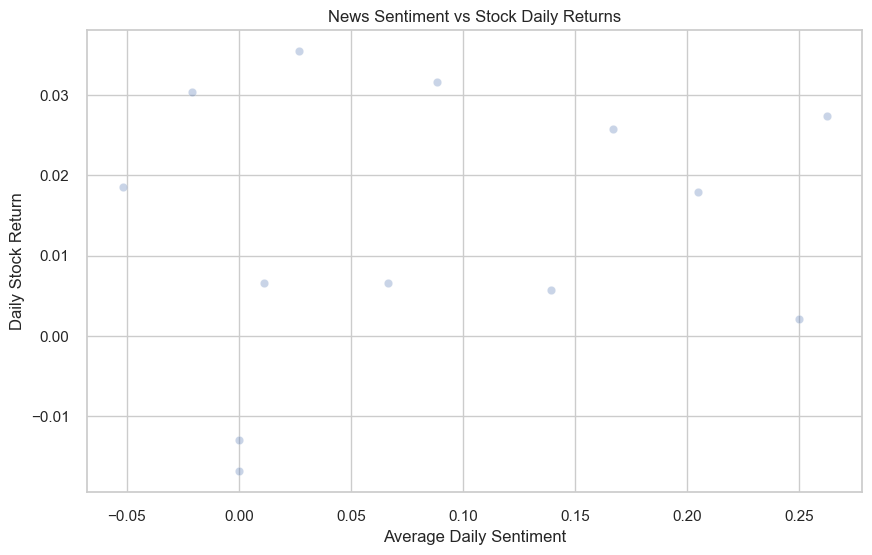

In [67]:
plt.figure(figsize=(10,6))
sns.scatterplot(
    data=sentiment_returns,
    x="avg_sentiment",
    y="daily_return",
    alpha=0.3  # makes points semi-transparent for dense data
)
plt.title("News Sentiment vs Stock Daily Returns")
plt.xlabel("Average Daily Sentiment")
plt.ylabel("Daily Stock Return")
plt.show()


C:\Users\hp\AppData\Local\Temp\ipykernel_14268\576219990.py:2: FutureWarning: DataFrameGroupBy.apply operated on the grouping columns. This behavior is deprecated, and in a future version of pandas the grouping columns will be excluded from the operation. Either pass `include_groups=False` to exclude the groupings or explicitly select the grouping columns after groupby to silence this warning.
  stock_corr = sentiment_returns.groupby("stock").apply(
C:\Users\hp\AppData\Local\Temp\ipykernel_14268\576219990.py:8: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(data=stock_corr.sort_values("correlation", ascending=False),


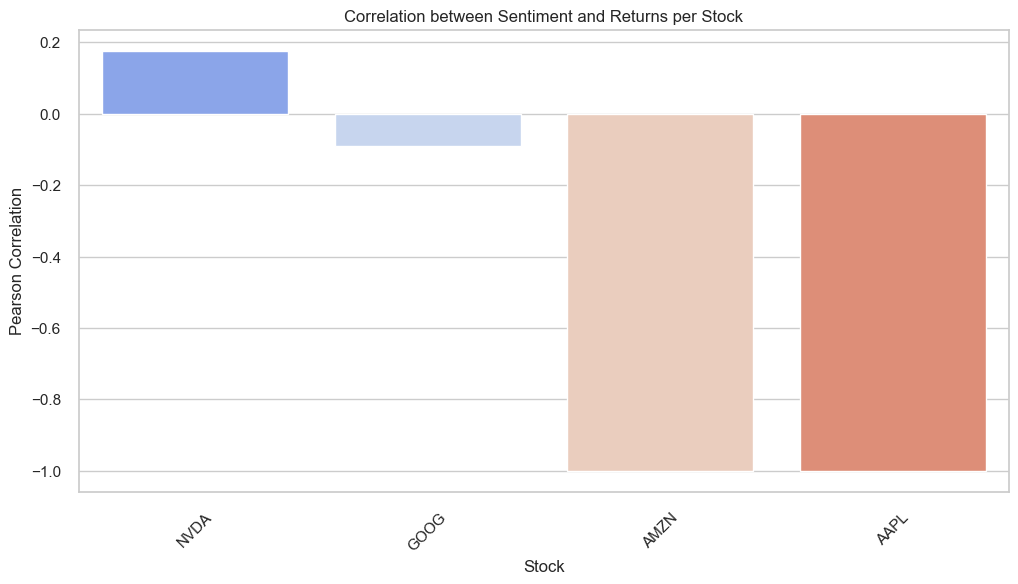

In [68]:
# Compute correlations per stock
stock_corr = sentiment_returns.groupby("stock").apply(
    lambda x: x["avg_sentiment"].corr(x["daily_return"])
).reset_index(name="correlation")

# Heatmap plot
plt.figure(figsize=(12,6))
sns.barplot(data=stock_corr.sort_values("correlation", ascending=False),
            x="stock", y="correlation", palette="coolwarm")
plt.xticks(rotation=45)
plt.title("Correlation between Sentiment and Returns per Stock")
plt.ylabel("Pearson Correlation")
plt.xlabel("Stock")
plt.show()


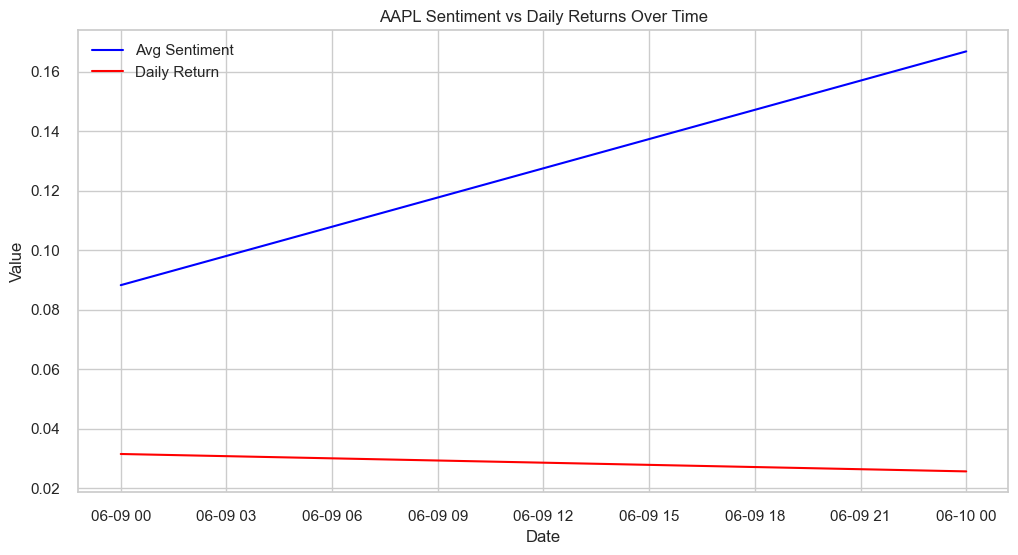

In [69]:
stock = "AAPL"
subset = sentiment_returns[sentiment_returns["stock"] == stock]

plt.figure(figsize=(12,6))
plt.plot(subset["news_date"], subset["avg_sentiment"], label="Avg Sentiment", color="blue")
plt.plot(subset["news_date"], subset["daily_return"], label="Daily Return", color="red")
plt.title(f"{stock} Sentiment vs Daily Returns Over Time")
plt.xlabel("Date")
plt.ylabel("Value")
plt.legend()
plt.show()


In [72]:
import pandas as pd
import talib
import matplotlib.pyplot as plt

# List of your stock CSV files
stock_files = ["AAPL.csv", "META.csv", "GOOG.csv", "MSFT.csv", "AMZN.csv", "NVDA.csv"]
stock_dict = {}  # This will store data for each stock

for file in stock_files:
    ticker = file.split(".")[0]  # Extract ticker
    df = pd.read_csv(f"../data/{file}", parse_dates=["Date"], index_col="Date")
    
    # Technical indicators
    df['MA20'] = talib.SMA(df['Close'], timeperiod=20)
    df['MA50'] = talib.SMA(df['Close'], timeperiod=50)
    df['RSI14'] = talib.RSI(df['Close'], timeperiod=14)
    df['MACD'], df['MACD_signal'], df['MACD_hist'] = talib.MACD(
        df['Close'], fastperiod=12, slowperiod=26, signalperiod=9
    )
    
    # Daily returns
    df['daily_return'] = df['Close'].pct_change()
    
    # Store in dictionary
    stock_dict[ticker] = df


In [74]:
from textblob import TextBlob

# Function to get polarity
def get_sentiment(text):
    return TextBlob(text).sentiment.polarity  # -1 (negative) to +1 (positive)

# Apply to headlines
ratings['sentiment'] = ratings['headline'].apply(get_sentiment)

# Check the first rows
ratings[['headline', 'sentiment']].head()


,headline,sentiment
0,Stocks That Hit 52-Week Highs On Friday,0.0
1,Stocks That Hit 52-Week Highs On Wednesday,0.0
2,71 Biggest Movers From Friday,0.0
3,46 Stocks Moving In Friday's Mid-Day Session,0.0
4,B of A Securities Maintains Neutral on Agilent...,0.0


In [75]:
# List of stock tickers
tickers = ["AAPL", "META", "GOOG", "MSFT", "AMZN", "NVDA"]

# Dictionary to store correlation results
correlation_results = {}

for ticker in tickers:
    # 1️⃣ Filter news for this stock
    stock_news = ratings[ratings['stock'] == ticker].copy()
    
    # Skip if no news
    if stock_news.empty:
        print(f"No news found for {ticker}")
        continue
    
    # 2️⃣ Keep only date part
    stock_news['date_only'] = stock_news['date'].dt.date
    
    # 3️⃣ Get stock returns
    stock_df = stock_dict[ticker].copy()
    stock_df['date_only'] = stock_df.index.date
    
    # 4️⃣ Merge news sentiment with stock returns
    merged_df = pd.merge(
        stock_news[['date_only', 'sentiment']],
        stock_df[['daily_return', 'date_only']],
        on='date_only',
        how='inner'
    )
    
    # 5️⃣ Aggregate sentiment per day
    daily_sentiment = merged_df.groupby('date_only')['sentiment'].mean().reset_index()
    daily_sentiment = pd.merge(
        daily_sentiment,
        stock_df[['daily_return', 'date_only']],
        on='date_only'
    )
    
    # 6️⃣ Calculate correlation
    corr = daily_sentiment['sentiment'].corr(daily_sentiment['daily_return'])
    correlation_results[ticker] = corr

# Show results
for ticker, corr in correlation_results.items():
    print(f"{ticker}: Sentiment vs Daily Return correlation = {corr:.4f}")


No news found for META
No news found for MSFT
AAPL: Sentiment vs Daily Return correlation = -1.0000
GOOG: Sentiment vs Daily Return correlation = -0.0894
AMZN: Sentiment vs Daily Return correlation = -1.0000
NVDA: Sentiment vs Daily Return correlation = 0.1757


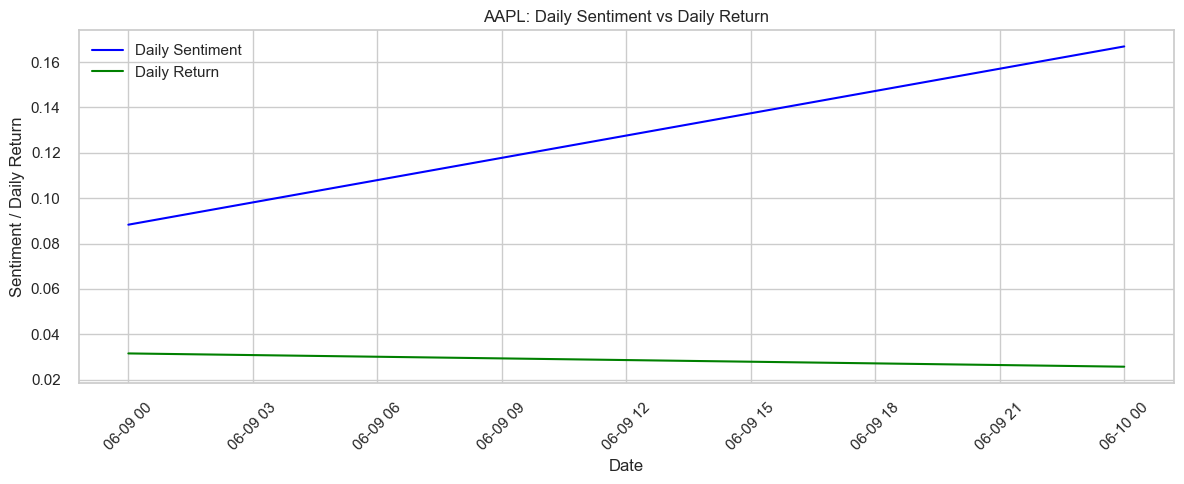

No news found for META


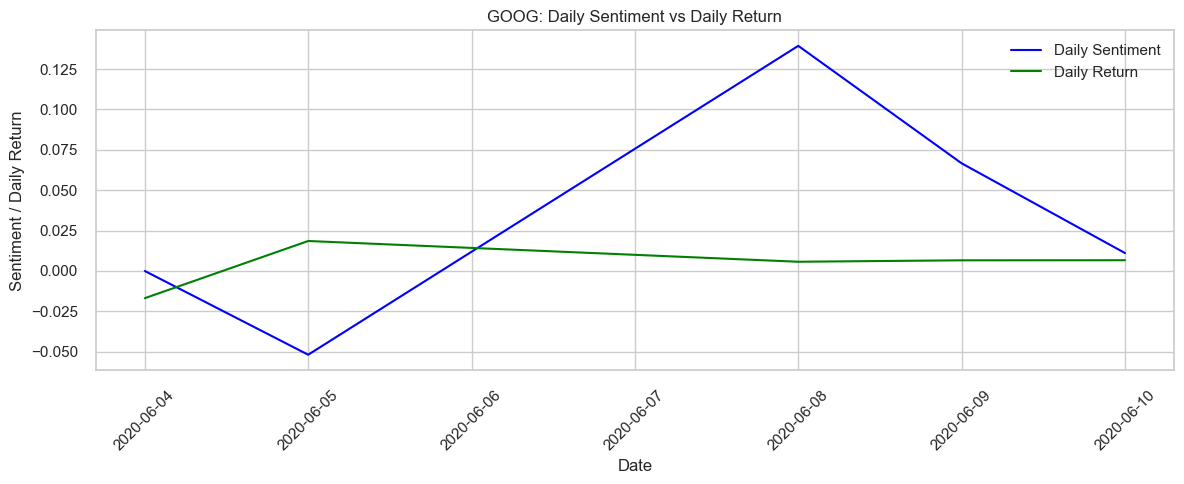

No news found for MSFT


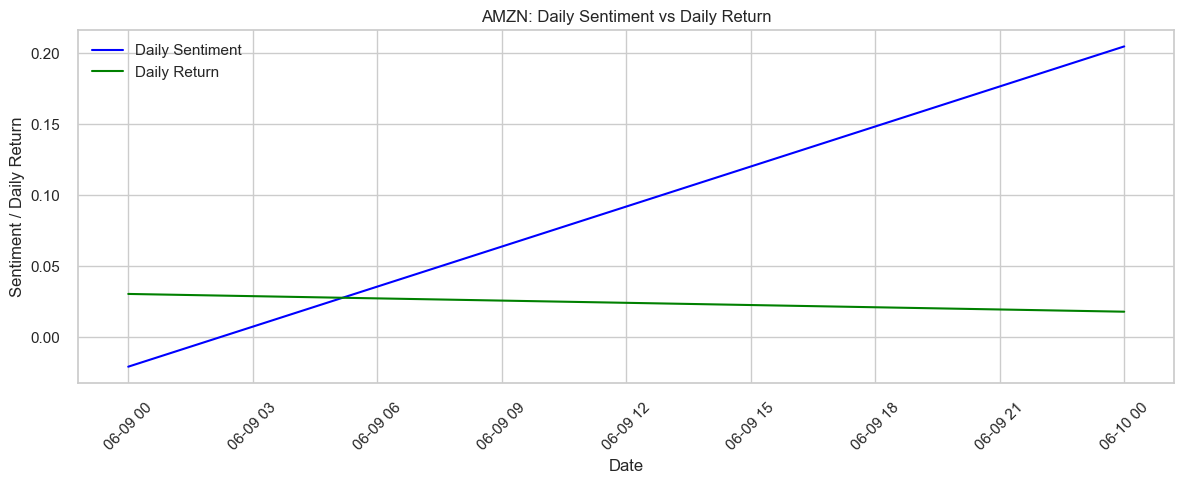

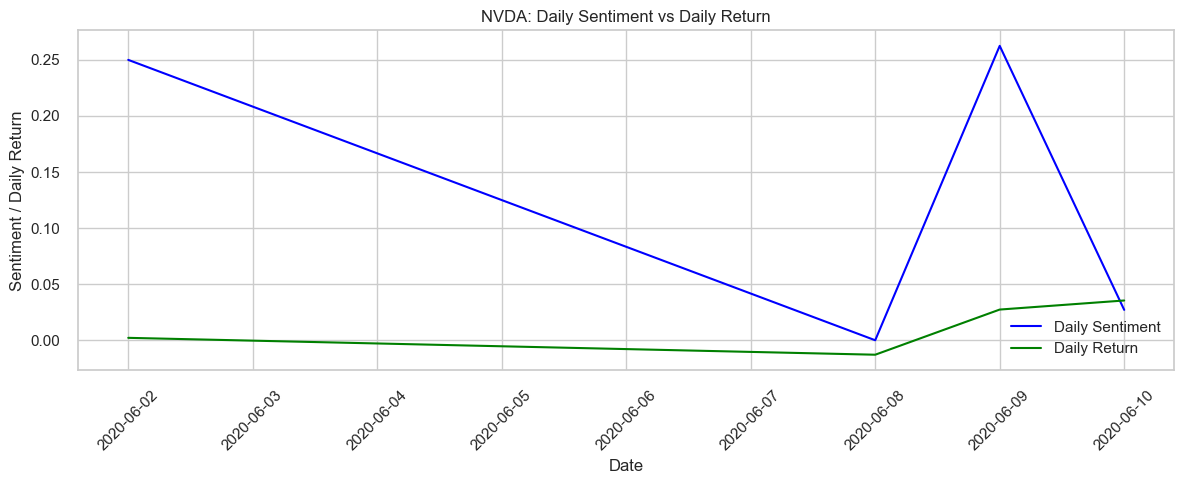

In [76]:
for ticker in tickers:
    # 1️⃣ Filter news for this stock
    stock_news = ratings[ratings['stock'] == ticker].copy()
    
    # Skip if no news
    if stock_news.empty:
        print(f"No news found for {ticker}")
        continue
    
    # 2️⃣ Keep only date part (ignore time)
    stock_news['date_only'] = stock_news['date'].dt.date
    
    # 3️⃣ Get stock returns
    stock_df = stock_dict[ticker].copy()
    stock_df['date_only'] = stock_df.index.date
    
    # 4️⃣ Merge news sentiment with stock returns
    merged_df = pd.merge(
        stock_news[['date_only', 'sentiment']],
        stock_df[['daily_return', 'date_only']],
        on='date_only',
        how='inner'
    )
    
    # 5️⃣ Aggregate sentiment per day
    daily_sentiment = merged_df.groupby('date_only')['sentiment'].mean().reset_index()
    daily_sentiment = pd.merge(
        daily_sentiment,
        stock_df[['daily_return', 'date_only']],
        on='date_only'
    )
    
    # 6️⃣ Plot daily sentiment vs daily return
    plt.figure(figsize=(12, 5))
    plt.plot(daily_sentiment['date_only'], daily_sentiment['sentiment'], label='Daily Sentiment', color='blue')
    plt.plot(daily_sentiment['date_only'], daily_sentiment['daily_return'], label='Daily Return', color='green')
    plt.title(f'{ticker}: Daily Sentiment vs Daily Return')
    plt.xlabel('Date')
    plt.ylabel('Sentiment / Daily Return')
    plt.legend()
    plt.xticks(rotation=45)
    plt.tight_layout()
    plt.show()